# Exploratory Data Analysis

This is the first step in any data science project.

## Elements of Structured Data 

There are two basic types of structured data: **numeric** and **categorical**.
- Numeric data comes in two forms: *continuous*, such as wind speed or time duration, and *discrete*, such as the count of the occurrence of an event.
- Categorical data takes only a fixed set of values, such as blood type, gender, or a country name. One type of categorical data is *binary* data which takes on only one of two values, such as 0/1, true/false. Another type of categorical data is *ordinal* data in which the categories are ordered, such as a numerical rating 1,2,3,4,5

The data type is important to help determine the type of visual display, data analysis, or statistical model.

## Estimates of Location or Measures of Central Tendency

Numeric data might have thousands of distinct values. A basic step in exploring the data is getting a "typical value" for each feature (variable): an estimate of where most of the data is located.

### Mean

is the sum of all values divided by the number of values.
<br><code>feature.mean()</code><br>

Other variations of the mean are:
- the *trimmed mean* which is calculated by dropping a fixed number of sorted values at each end and then taking an average of the remaining values. The trimmed mean eliminates the influence of extreme values (outliers).<br><code>
  from scipy.stats import trim_mean
  trim_mean(feature, 0.1)</code><br>
  
- the *weighted mean* which you calculate by multiplying each data value x<sub>i</sub>, by a user-specified weight w<sub>i</sub> and dividing their sum by the sum of the weights.<br>
  <code>np.average(feature, weights=*feature to use as weights*)
  </code><br>
The weighted mean can be used when:
  - Some values are intrinsically more variable than others, and highly variable observations are given a lower weight. For example, if we are taking the average from multiple sensors and one of the sensors is less accurate, then we might downweight the data from that sensor.
  - The data collected does not equally represent the different groups that we are interested in measuring. For example, because of the way an online experiment was conducted, we may not have a set of data that accurately reflects all groups in the user base. To correct that, we can give a higher weight to the values from the groups that were underrepresented.

### Median

is the middle value in a sorted list of data. The median depends only on the values in the center of the sorted data and is not influenced by outliers.
<code>
feature.median()
</code>

Being an outlier in itself does not make a data value invalid or erroneous, although outliers are often the result of data errors or bad readings from a sensor.

## Estimates of Variability or Measures of Dispersion

measure whether the data values are tightly clustered or spread out.
- *Mean absolute deviation* is the average of the absolute values of the deviations from the mean.
- *Variance* is an average of the squared deviations from the mean
- *Standard deviation* is the square root of the variance.
<code>feature.std()</code><br>

*All the above measures are sensitive to outliers.*
A robust estimate of variability is the *median absolute deviation from the median*

- *Range* is the difference between the largest and smallest values. It is extremely sensitive to outliers.
- The *Pth percentile* is a value such that at least P percent of the values take on this value or less and at least (100-P) percent of the values take on this value or more.<br>
<code>np.percentile(feature, .25)</code> or <code>feature.quantile(.25)</code><br>
- The *interquartile range* is the difference between the 25th percentile and the 75th percentile

## Exploring the Data Distribution

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
states = pd.read_csv('data/state.csv')

In [24]:
states

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA
5,Colorado,5029196,2.8,CO
6,Connecticut,3574097,2.4,CT
7,Delaware,897934,5.8,DE
8,Florida,18801310,5.8,FL
9,Georgia,9687653,5.7,GA


In [26]:
states['Murder.Rate'].quantile([.05, .25, .5, .75, .95])

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64

<Axes: >

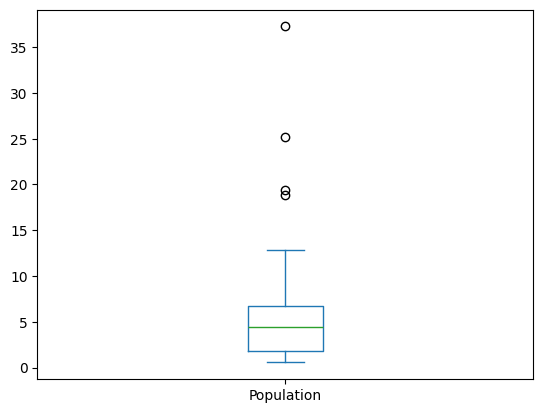

In [30]:
(states['Population']/1_000_000).plot(kind='box')

In [35]:
binned_population = pd.cut(states['Population'], 10)
binned_population.value_counts()

Population
(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(15239758.0, 18908791.0]     1
(18908791.0, 22577824.0]     1
(22577824.0, 26246857.0]     1
(33584923.0, 37253956.0]     1
(26246857.0, 29915890.0]     0
(29915890.0, 33584923.0]     0
Name: count, dtype: int64

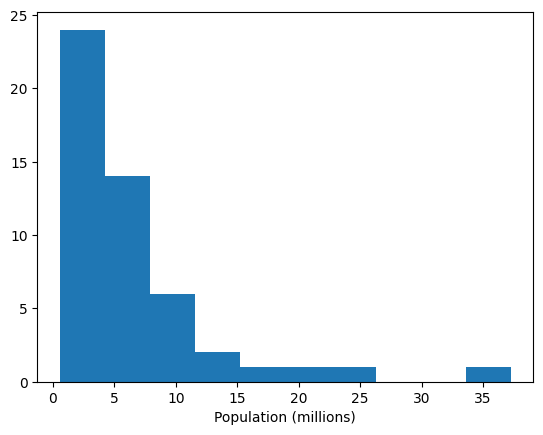

In [58]:
ax = (states['Population']/1_000_000).hist()
ax.set_xlabel('Population (millions)')
ax.grid(0)

Text(0.5, 0, 'Murder Rate (per 100,000)')

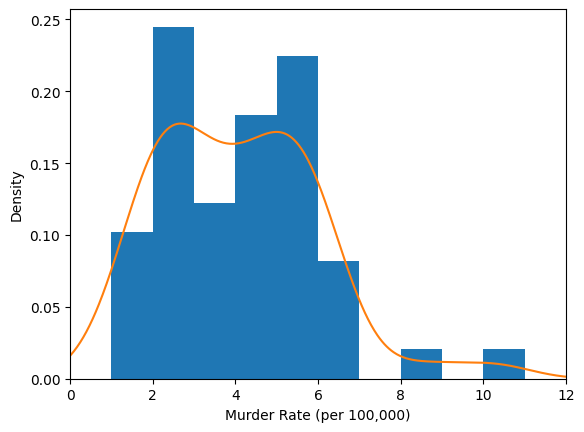

In [56]:
ax = states['Murder.Rate'].plot.hist(density=True, xlim=[0,12], 
                                    bins=range(1,12))
states['Murder.Rate'].plot.density(ax=ax)
ax.set_xlabel('Murder Rate (per 100,000)')

In [66]:
pd.cut(states['Murder.Rate'], bins=range(1,12)).value_counts()

Murder.Rate
(5, 6]      11
(2, 3]      10
(1, 2]       8
(4, 5]       8
(3, 4]       7
(6, 7]       3
(8, 9]       1
(10, 11]     1
(7, 8]       0
(9, 10]      0
Name: count, dtype: int64

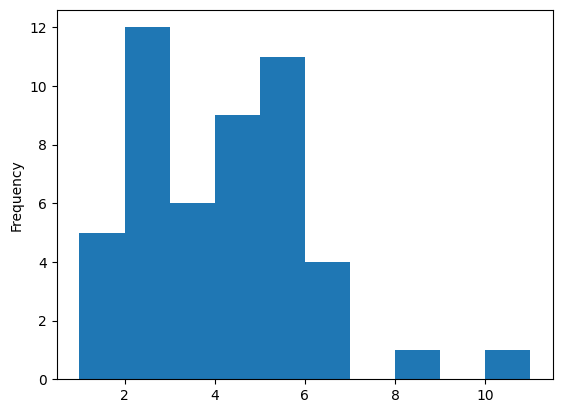

In [71]:
ax = states['Murder.Rate'].plot.hist(bins=range(1,12))

### Exploring Binary and Categorical Data

In [75]:
dfw = pd.read_csv('data/dfw_airline.csv')
dfw

,Carrier,ATC,Weather,Security,Inbound
0,64263.16,84856.5,11235.42,343.15,118427.82


Text(0, 0.5, 'Count')

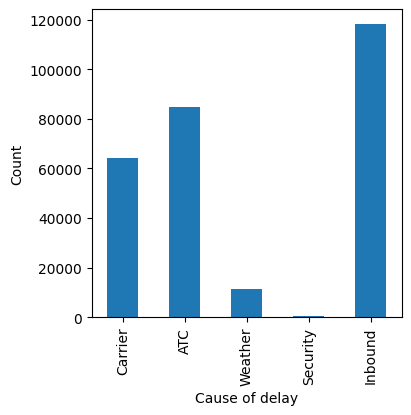

In [80]:
ax = dfw.transpose().plot.bar(figsize=(4,4), legend=False)
ax.set_xlabel('Cause of delay')
ax.set_ylabel('Count')

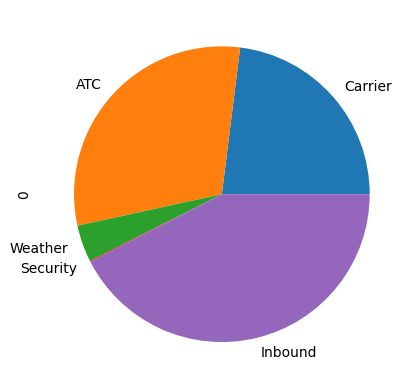

In [97]:
ax = dfw.transpose().plot.pie(subplots=True, legend=False)